In [169]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display

In [170]:
pd.set_option('display.max_columns', None)

In [171]:
df = pd.read_csv('~/ds_bootcamp/ds-phase-0/learning/datasets/_data.csv', index_col='Unnamed: 0')

In [172]:
df['Стоимость аренды'] = df['Цена'].str.extract('(\d+\.?\d*)').astype('float')
df.head()

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление,Стоимость аренды
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157,500000.0
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126,500000.0
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086,500000.0
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456,400000.0
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615,225000.0


### Предобработка признаков

#### Цена

*Создаем два новых признака: стоимость аренды и стоимость залога ('rental_price', 'collateral'). В связи с этим столбцы Цена и Стоимость Аренды(был создан для анализа) удаляем.*

In [173]:
def rent_deposit(row):
    result = [float(c) for c in row.split() if c.replace('.', '', 1).isdigit()]
    return result

In [174]:
df[['rental_price', 'collateral']] = df['Цена'].apply(rent_deposit).apply(lambda x: pd.Series(x[:2]))

In [175]:
# удаление лишних столбцов
df = df.drop(['Цена', 'Стоимость аренды'], axis=1)

In [176]:
# смотрим пропуски по ним
df[['rental_price', 'collateral']].isna().sum()

rental_price     0
collateral      62
dtype: int64

*В rental_price пропусков нет, в collateral 62 пропуска.*

In [177]:
sorted(list(df['collateral'].unique()))

[1.0,
 2.0,
 2.5,
 20.0,
 40.0,
 140.0,
 1500.0,
 1760.0,
 2000.0,
 2160.0,
 2240.0,
 2500.0,
 2800.0,
 2900.0,
 3000.0,
 3500.0,
 4000.0,
 5000.0,
 5409.0,
 7000.0,
 8000.0,
 10000.0,
 11000.0,
 12000.0,
 13000.0,
 15000.0,
 17500.0,
 18000.0,
 18500.0,
 19000.0,
 20000.0,
 22000.0,
 22500.0,
 23000.0,
 24000.0,
 25000.0,
 25990.0,
 26000.0,
 27000.0,
 28000.0,
 29000.0,
 29999.0,
 30000.0,
 32000.0,
 33000.0,
 33500.0,
 34000.0,
 34990.0,
 35000.0,
 35500.0,
 36000.0,
 36999.0,
 37000.0,
 37500.0,
 38000.0,
 39000.0,
 40000.0,
 40500.0,
 41000.0,
 42000.0,
 43000.0,
 44000.0,
 44990.0,
 45000.0,
 46000.0,
 47000.0,
 48000.0,
 49000.0,
 49500.0,
 49700.0,
 50000.0,
 52000.0,
 53000.0,
 54000.0,
 55000.0,
 56000.0,
 57000.0,
 57500.0,
 58000.0,
 59000.0,
 60000.0,
 62000.0,
 63000.0,
 64000.0,
 65000.0,
 67000.0,
 68000.0,
 69000.0,
 70000.0,
 73000.0,
 74990.0,
 75000.0,
 78000.0,
 79000.0,
 80000.0,
 85000.0,
 90000.0,
 95000.0,
 99000.0,
 100000.0,
 105000.0,
 110000.0,
 115000.0,
 

*В collateral видим выбросы, вряд ли цена залога может быть менее 1000 руб. Это выбросы. Заменим такие цены сначала на NaN, а потом все NaN нулями, предположив, что если стоимость залога не указана, значит, его не было, значит, стоимость ровна нулю.*

In [178]:
df.loc[df['collateral'] < 1000]['collateral'].head()

111    2.0
118    1.0
201    1.0
209    1.0
255    1.0
Name: collateral, dtype: float64

In [179]:
# замена на пропущенные значения
df.loc[df['collateral'] < 1000, 'collateral'] = np.nan

In [180]:
# замена пропущенных значений в collateral на нули
df['collateral'] = df['collateral'].fillna(0)

In [181]:
print(f"количество пропусков в 'collateral': {df['collateral'].isna().sum()}")

количество пропусков в 'collateral': 0


**Вывод. Создано два новых признака, один из которых целевой - rental_price, в котором пропуски отсутствуют. Лишние признаки цены удалены, пропуски заполнены нулями в признаке collateral**

#### ID объявления  (требуется удаление, но оставляем по задаче 3го релиза)

#### Количество комнат

*Из признака Количество комнат получаем новый признак rooms в виде числового значения, страный признак подлежит удалению*

In [182]:
def rooms(row):
    try:
        result = int([c for c in row.split(',')][0])
        return result
    except: None

In [183]:
df['rooms'] = df['Количество комнат'].apply(rooms)

In [184]:
# удаляем старый признак Количество комнат
df = df.drop('Количество комнат', axis=1)
df.head(3)

,ID объявления,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление,rental_price,collateral,rooms
0,271271157,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157,500000.0,500000.0,4.0
1,271634126,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126,500000.0,500000.0,4.0
2,271173086,Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086,500000.0,500000.0,4.0


In [185]:
# тип нового признака
df['rooms'].dtypes

dtype('float64')

In [186]:
# пропусков в новом признаке
print(f"количество пропусков: {df['rooms'].isna().sum()}")
print(f"количество пропусков в %: {df['rooms'].isna().sum() / len(df) * 100}")

количество пропусков: 1041
количество пропусков в %: 4.454809996576515


In [187]:
# уникальные значения в новом признаке
sorted(list(df['rooms'].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan]

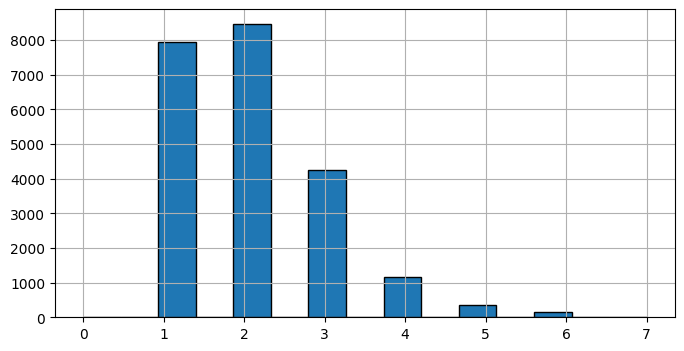

In [188]:
df['rooms'].hist(bins=15, figsize=(8, 4), range=(0, 7), ec='black');

In [189]:
# ставим временно заглушку 
df.loc[df['rooms'].isna(), 'rooms'] = 'unknown'

/tmp/ipykernel_22153/530145741.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['rooms'].isna(), 'rooms'] = 'unknown'


<div class="alert alert-info">
<h2> Комментарий <a class="tocSkip"> </h2>
Предлагаю пропуски в rooms удалить, их всего 4,5%, заменить нулями - будет ложная инфа, проверила про колонкам с примечаниями, заменить заглушкой - тоже ложная, машина вопримет как какое-то значение
</div>

#### Тип (удаление)

In [190]:
df = df.drop('Тип', axis=1)
df.head(3)

,ID объявления,Метро,Адрес,"Площадь, м2",Дом,Парковка,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление,rental_price,collateral,rooms
0,271271157,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157,500000.0,500000.0,4.0
1,271634126,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126,500000.0,500000.0,4.0
2,271173086,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086,500000.0,500000.0,4.0


#### Метро

##### делаем отдельный признак пешей доступности до квартиры

In [191]:
df['min_walk'] = df['Метро'].str.extract(r'(\d+) мин пешком', expand=False).astype(float)

In [192]:
df[['Метро', 'min_walk']].tail(10)

,Метро,min_walk
23358,м. Солнцево (4 мин пешком),4.0
23359,м. Говорово (11 мин пешком),11.0
23360,м. Солнцево (5 мин на машине),NaN
23361,м. Солнцево (10 мин пешком),10.0
23362,м. Говорово (8 мин пешком),8.0
23363,м. Говорово (8 мин пешком),8.0
23364,м. Солнцево (7 мин пешком),7.0
23365,м. Солнцево (6 мин пешком),6.0
23366,м. Солнцево (11 мин пешком),11.0
23367,м. Говорово (10 мин пешком),10.0


In [193]:
# тип нового признака
df['min_walk'].dtypes

dtype('float64')

In [194]:
# пропусков в новом признаке
print(f"количество пропусков: {df['min_walk'].isna().sum()}")
print(f"количество пропусков в %: {df['min_walk'].isna().sum() / len(df) * 100}")

количество пропусков: 5055
количество пропусков в %: 21.632146525162614


*Пропуски в данной колонке говорят о том, что информация либо не заполнена, либо была указана удаленность на машине. Имеет смысл заполнить выбросом, пусть это будет 1000 минут.*

In [195]:
df['min_walk'] = df['min_walk'].fillna(1000)

In [196]:
# пропусков после заполнения
print(f"количество пропусков: {df['min_walk'].isna().sum()}")

количество пропусков: 0


In [197]:
df['min_walk'].sort_values(ascending=False)

7209     1000.0
6971     1000.0
19086    1000.0
13357    1000.0
7034     1000.0
          ...  
752         0.0
20458       0.0
9800        0.0
1245        0.0
14070       0.0
Name: min_walk, Length: 23368, dtype: float64

##### делаем отдельный признак - название станции метро

In [198]:
m = df['Метро']

In [199]:
def metro(row):
    if isinstance(row, float):
        return row  # or any other appropriate action for float values
    result = row.split('(')[0].strip('м. ')
    return result

In [200]:
df['metro'] = df['Метро'].apply(metro)

In [201]:
# уникальные значения в новом признаке, количество
df['metro'].nunique()

332

In [202]:
# пропусков в новом признаке
print(f"количество пропусков: {df['metro'].isna().sum()}")
print(f"количество пропусков в %: {df['metro'].isna().sum() / len(df) * 100}")

количество пропусков: 1315
количество пропусков в %: 5.627353646011639


In [203]:
# ставим заглушку в пропуски
df.loc[df['metro'].isna(), 'metro'] = 'unknown'

<div class="alert alert-info">
<h2> Комментарий <a class="tocSkip"> </h2>
Предлагаю удалить новый столбец с 333 метро или Рома его по группам-категориям разбивает, если захочет
</div>

In [204]:
# удаление лишнего столбца
df = df.drop('Метро', axis=1)

 #### Адрес

<div class="alert alert-info">
<h2> Комментарий <a class="tocSkip"> </h2>
Имеет смысл удалить колонку адрес, так как в ней обнаружены только два города Москва и Питер. Предварительно необходимо воспользоваться этой колонкой для удаления объектов по Питеру, затем можно удалить признак Адрес
</div>

#### Дом

*Из признака Дом получаем два новых признака floor и floor в виде числового значения, страный признак подлежит удалению*

In [205]:
def extract_values(row):
    values = row.split('/')
    value1 = values[0]
    value2 = values[1].split(',')[0].strip()
    return int(value1), int(value2)

In [206]:
df['floor'], df['floors_total'] = zip(*df['Дом'].apply(extract_values))
df.head()

,ID объявления,Адрес,"Площадь, м2",Дом,Парковка,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление,rental_price,collateral,rooms,min_walk,metro,floor,floors_total
0,271271157,"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157,500000.0,500000.0,4.0,9.0,Смоленская,5,16
1,271634126,"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126,500000.0,500000.0,4.0,8.0,Смоленская,5,16
2,271173086,"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086,500000.0,500000.0,4.0,7.0,Смоленская,5,16
3,272197456,"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456,400000.0,400000.0,4.0,3.0,Смоленская,5,6
4,273614615,"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615,225000.0,225000.0,2.0,7.0,Арбатская,12,26


In [207]:
# пропусков в новом признаке floor
print(f"количество пропусков floor: {df['floor'].isna().sum()}")
print(f"количество пропусков floor в %: {df['floor'].isna().sum() / len(df) * 100}")

количество пропусков floor: 0
количество пропусков floor в %: 0.0


In [208]:
# пропусков в новом признаке floors_total
print(f"количество пропусков floors_total: {df['floors_total'].isna().sum()}")
print(f"количество пропусков floors_total в %: {df['floors_total'].isna().sum() / len(df) * 100}")

количество пропусков floors_total: 0
количество пропусков floors_total в %: 0.0


In [209]:
# тип нового признака floor
df['floor'].dtypes

dtype('int64')

In [210]:
# тип нового признака floors_total
df['floors_total'].dtypes

dtype('int64')

In [211]:
# удаление лишнего столбца
df = df.drop('Дом', axis=1)

**Вывод. Создано два новых признака, пропусков в них нет. Признак-родитель новых признаков удален в виду отсутствия неинформативности и целесообразности для машинного обучения.**

#### Парковка

*Имеет смысл закодировать наличие любой парковки как 1, а ее отсутствие - 0*

In [212]:
list(df['Парковка'].unique())

['подземная', nan, 'наземная', 'открытая', 'многоуровневая', 'на крыше']

In [213]:
df.loc[~df['Парковка'].isna(), 'Парковка'] = 1

In [214]:
df.loc[df['Парковка'].isna(), 'Парковка'] = 0

In [215]:
# пропусков в новом признаке Парковка
print(f"количество пропусков Парковка: {df['Парковка'].isna().sum()}")
print(f"количество пропусков Парковка в %: {df['Парковка'].isna().sum() / len(df) * 100}")

количество пропусков Парковка: 0
количество пропусков Парковка в %: 0.0


In [216]:
df.head()

,ID объявления,Адрес,"Площадь, м2",Парковка,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление,rental_price,collateral,rooms,min_walk,metro,floor,floors_total
0,271271157,"Москва, улица Новый Арбат, 27",200.0/20.0,1,+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157,500000.0,500000.0,4.0,9.0,Смоленская,5,16
1,271634126,"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,1,+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126,500000.0,500000.0,4.0,8.0,Смоленская,5,16
2,271173086,"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,1,"+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086,500000.0,500000.0,4.0,7.0,Смоленская,5,16
3,272197456,"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,1,"+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456,400000.0,400000.0,4.0,3.0,Смоленская,5,6
4,273614615,"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,0,+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615,225000.0,225000.0,2.0,7.0,Арбатская,12,26


## Обработка колонки "Площадь, м2":

   

In [217]:
#считаем пропущенные значения
df['Площадь, м2'].isna().sum() 

0

In [218]:
#Создание Series для замены столбца "Площадь, м2": оставляем только первое значение, т.к. это общая площадь 
lst = df['Площадь, м2'].tolist() 
new = []
for i in lst:
    if len(i)<=4: 
        i = float(i) #если только одно значение, без дальнейших /, првращаем во float
    else: 
        i = i.split('/')[0] #разделяем по /
    new.append(i)
sq_correct = pd.Series(new)
sq_correct  
#df['Площадь, м2'] = df['Площадь, м2'].apply(lambda x: float(x) if len(x) <= 4 else x.split('/')[0] for x in df['Площадь, м2'].tolist())

0        200.0
1        198.0
2        200.0
3        170.0
4         58.0
         ...  
23363     35.0
23364     38.7
23365     43.1
23366     52.5
23367     90.0
Length: 23368, dtype: object

In [219]:
df['Площадь, м2'] = sq_correct #заменили столбец
df['Площадь, м2'] 


0        200.0
1        198.0
2        200.0
3        170.0
4         58.0
         ...  
23363     35.0
23364     38.7
23365     43.1
23366     52.5
23367     90.0
Name: Площадь, м2, Length: 23368, dtype: object

## Обработка колонки "Ремонт":

In [220]:
def repair(val): #кодирование уникальных значений в соответсвии со словарем и заполнение пропусков
    d = {'Дизайнерский':1, 'Евроремонт':2, 'Косметический':3, 'Без ремонта':4, 0:0}
    return d[val]

df['Ремонт'] = df['Ремонт'].fillna(0)
df['Ремонт'] = df['Ремонт'].apply(lambda x: repair(x))
df['Ремонт'] 



0        1
1        1
2        2
3        2
4        2
        ..
23363    2
23364    2
23365    1
23366    2
23367    3
Name: Ремонт, Length: 23368, dtype: int64

## Обработка колонки "Балкон":

In [221]:
df['Балкон'].unique() #находим уникальные значения

array([nan, 'Балкон (1)', 'Балкон (3)', 'Лоджия (1)',
       'Балкон (2), Лоджия (3)', 'Балкон (1), Лоджия (1)', 'Балкон (2)',
       'Лоджия (2)', 'Балкон (3), Лоджия (3)', 'Балкон (3), Лоджия (1)',
       'Лоджия (3)', 'Балкон (1), Лоджия (2)', 'Балкон (2), Лоджия (1)',
       'Балкон (2), Лоджия (2)', 'Балкон (1), Лоджия (3)', 'Балкон (4)',
       'Лоджия (4)', 'Балкон (4), Лоджия (4)', 'Балкон (1), Лоджия (4)'],
      dtype=object)

In [222]:

balcony = df['Балкон'].str.split(',', expand=True) #разделяем по "," на две колонки, если есть и лоджии, и балконы 
        
one = balcony[0].str.split('(', expand=True) #разделяем первую из получившихся колонок по "(" на две колонки вид балкона и количество

two = balcony[1].str.split('(', expand=True) #разделяем первую из получившихся колонок по "(" на две колонки вид балкона и количество

combined = pd.concat([one, two], axis=1) #склеиваем 4 колонки

new_columns = ['Column1', 'Column2', 'Column3', 'Column4'] #переименовали колонки
combined = combined.set_axis(new_columns, axis=1)

combined['Column2'] = combined['Column2'].str.replace(')', '') #удалили ")" из столбцов с количеством лишний символ
combined['Column4'] = combined['Column4'].str.replace(')', '') #удалили ")" из столбцов с количеством лишний символ

c1 = combined['Column1'].fillna('') + combined['Column3'].fillna('') #конкатим строки столбцов 1 и 3
c2 = combined['Column2'].fillna('').apply(lambda x: int(x) if x != '' else 0) + combined['Column4'].fillna('').apply(lambda x: int(x) if x != '' else 0) #конкатим строки столбцов 2 и 4

final = pd.concat([c1, c2], axis=1) #делаем финальный дф с новыми столбцами
new_columns2 = ['Балконы/лоджии', 'Количество балконов']
final = final.set_axis(new_columns2, axis=1)
final['Балконы/лоджии'] = final['Балконы/лоджии'].str.replace(' ', '') #переименовываем колонки
final['Балконы/лоджии'].unique() #проверяем, что все ок 

def balc(val): #кодирование уникальных значений в соответсвии со словарем и заполнение пропусков
    d = {'Балкон': 1, 'Лоджия': 1, 'БалконЛоджия': 1, '': 0}

    return d[val]

final['Балконы/лоджии'] = final['Балконы/лоджии'].fillna('').apply(lambda x: balc(x))
final.tail(20)



,Балконы/лоджии,Количество балконов
23348,0,0
23349,1,1
23350,0,0
23351,0,0
23352,0,0
23353,1,1
23354,1,1
23355,0,0
23356,1,2
23357,0,0


In [223]:
df['Балкон'] = final['Балконы/лоджии']

df.columns.get_loc('Балкон')
a = df.insert(loc=15, column='Количество балконов', value= final['Количество балконов'].values) #вставляем новую колонку в наш ДФ
df

,ID объявления,Адрес,"Площадь, м2",Парковка,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,Количество балконов,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление,rental_price,collateral,rooms,min_walk,metro,floor,floors_total
0,271271157,"Москва, улица Новый Арбат, 27",200.0,1,+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,1,NaN,0,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,0,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157,500000.0,500000.0,4.0,9.0,Смоленская,5,16
1,271634126,"Москва, улица Новый Арбат, 27",198.0,1,+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,1,25 25 20 25,0,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,0,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126,500000.0,500000.0,4.0,8.0,Смоленская,5,16
2,271173086,"Москва, улица Новый Арбат, 27",200.0,1,"+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",2,NaN,0,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,0,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086,500000.0,500000.0,4.0,7.0,Смоленская,5,16
3,272197456,"Москва, переулок Плотников, 21С1",170.0,1,"+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,2,14-42-20-19,0,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,0,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456,400000.0,400000.0,4.0,3.0,Смоленская,5,6
4,273614615,"Москва, улица Новый Арбат, 15",58.0,0,+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,2,20 18,0,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,0,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615,225000.0,225000.0,2.0,7.0,Арбатская,12,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,215565511,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0,0,+79154383401,Сдаётся светлая теплая квартира (студия) с бал...,2,NaN,1,NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,1,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511,42000.0,42000.0,unknown,8.0,Говорово,10,14
23364,274654844,"Москва, Производственная улица, 8к1, ш. Боровс...",38.7,0,+79151173402,Сдам однокомнатную квартиру на длительный срок...,2,NaN,1,Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,1,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844,45000.0,45000.0,1.0,7.0,Солнцево,5,18
23365,268679909,"Москва, Боровский проезд, 11",43.1,0,+79653825192,Рассматриваются квартиранты только славяне и т...,1,NaN,1,На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,1,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909,50000.0,50000.0,2.0,6.0,Солнцево,5,5
23366,274807525,"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5,1,+79660611965,Двухкомнатная уютная квартира с видом во внутр...,2,NaN,1,Во двор,"Совмещенный (1), Раздельный (1)",NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,1,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525,55000.0,50000.0,2.0,11.0,Солнцево,8,23


## Обработка колонки "Окна":

In [224]:
def repair(val): #кодирование уникальных значений в соответсвии со словарем и заполнение пропусков
    d = {'На улицу и двор':1, 'Во двор':2, 'На улицу':3, 0:0}
    return d[val]

df['Окна'] = df['Окна'].fillna(0)
df['Окна'] = df['Окна'].apply(lambda x: repair(x))


## Установка заглушек в колонках, подлежащих удалению

In [225]:
#Замена на заглушки в колонках на удаление 
df['Площадь комнат, м2'] = df['Площадь комнат, м2'].fillna('Не указана')
df['Телефоны'] = df['Телефоны'].fillna('Не указаны')

df[['Площадь, м2', 'Телефоны', 'Описание', 'Ремонт', 'Площадь комнат, м2', 'Балкон',  'Количество балконов', 'Окна']].tail(20)

,"Площадь, м2",Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Количество балконов,Окна
23348,35.0,+74954760059,Писать в WhatsApp\n\nСобственник\n\nЗаселение ...,3,Не указана,0,0,0
23349,41.0,+79645384054,"Квартира после качественного, дизайнерского ре...",2,17,1,1,0
23350,47.0,+79104748814,"Сдаётся уютная, полностью обустроенная (холоди...",2,Не указана,0,0,3
23351,40.0,+79160863326,"Сдам квартиру в отличном состоянии , Большая к...",3,Не указана,0,0,0
23352,34.5,+79623670306,"Сдам однокомнатную квартиру 34,5 м2 с мебелью ...",3,Не указана,0,0,0
23353,45.0,+79067953058,Я Собственник...\nВидовая квартира в доме бизн...,2,Не указана,1,1,3
23354,54.0,+79151108786,За объект уже внесли аванс\nВ ЖК комфорт-класс...,2,13+12,1,1,3
23355,47.0,+74954760059,"Собственник. Без посредников, без комиссий. Сд...",2,Не указана,0,0,0
23356,75.0,+79660588363,"Рады приветствовать вас,дорогие читатели. Квар...",3,40,1,2,1
23357,46.5,+79151431006,БЕЗ ЗВОНКОВ! Пишите в сообщениях для связи.\nУ...,1,Не указана,0,0,3


## Корреляции

In [226]:
#df['Площадь, м2'].corr(df['Стоимость аренды']) 
#df['Ремонт'].corr(df['Стоимость аренды']) 
#df['Балкон'].corr(df['Стоимость аренды']) 
#df['Количество балконов'].corr(df['Стоимость аренды']) 
#df['Окна'].corr(df['Стоимость аренды']) 

## Новые названия колонок

In [227]:
#новые названия колонок
new_names = {
    'ID  объявления': 'id','Количество комнат': 'number_of_rooms','Тип': 'type',
    'Метро': 'metro', 'Адрес': 'adress', 'Площадь, м2': 'total_square',
    'Дом': 'house_type', 'Парковка':'parking', 'Цена': 'price',
    'Телефоны': 'phone numbers', 'Описание': 'description', 'Ремонт':'renovation',
    'Площадь комнат, м2': 'room_square', 'Балкон': 'balcony', 'Количество балконов': 'balcony_number',
    'Окна': 'windows', 'Санузел': 'bath', 'Можно с детьми/животными': 'child_animals',
    'Дополнительно': 'addition', 'Название ЖК': 'residential_complex', 'Серия дома':'house_series',
    'Высота потолков, м':'ceiling_height', 'Лифт':'elevator', 'Мусоропровод':'trash',
    'Ссылка на объявление':'link', 'Стоимость аренды':'rent_price'

}

df = df.rename(columns=new_names)
df.head(2)

,id,adress,total_square,parking,phone numbers,description,renovation,room_square,balcony,windows,bath,child_animals,addition,residential_complex,house_series,balcony_number,ceiling_height,elevator,trash,link,rental_price,collateral,rooms,min_walk,metro,floor,floors_total
0,271271157,"Москва, улица Новый Арбат, 27",200.0,1,+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,1,Не указана,0,0,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,0,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157,500000.0,500000.0,4.0,9.0,Смоленская,5,16
1,271634126,"Москва, улица Новый Арбат, 27",198.0,1,+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,1,25 25 20 25,0,1,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,0,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126,500000.0,500000.0,4.0,8.0,Смоленская,5,16


In [228]:
# ['bath', 'child_animals', 'Ссылка на объявление', 'residential_complex', 'house_series', 'ceiling_height', 'elevator', 'trash', 'Ссылка на объявление']

## Обработка колонки "Санузел"

In [229]:
def bath_q(strn):  # создаем функцию, которая считает количество санузлов вне зависимости от вида
    if strn != 1:
        strn = strn.split()
        if len(strn) == 4:
            a = int(strn[1][1])
            b = int(strn[3][1])
            return a + b
        else:
            a = int(strn[1][1])
            return a
    else:
        return strn
        
df['bath'] = df['bath'].fillna(1).apply(lambda x: bath_q(x)) # заполняем пропуски 1, т.к. один санузел точно в квартире есть

## Обработка колонки "Можно с детьми/животными"

In [230]:
def child_animals_func(val): # создаем функцию с распределением признака согласно словарю
    d = {'Можно с животными':1, 'Можно с детьми':2, 'Можно с детьми, Можно с животными':3, 0:0}
    return d[val]

df['child_animals'] = df['child_animals'].fillna(0).apply(lambda x: child_animals_func(x)) # применяем функцию, пропуск заполняем 0

## Обработка колонки "Дополнительно"

In [231]:
del df['addition'] # было принято решение не использовать данную колонку в анализе, т.к. 593 уникальных значения текста обрабатывать представилось нецелесообразным.

## Обработка колонки "Название ЖК"

In [232]:
df['residential_complex'] = df['residential_complex'].fillna(0).apply(lambda x: 1 if x != 0 else x) # пропуски заполняем 0, через лямбду присваиваем именованным комплексам 1

## Обработка колонки "Серия дома"

In [233]:
df['house_series'] = df['house_series'].apply(lambda x: 0 if x not in ['индивидуальный проект', 'Индивидуальный проект'] else 1) # фактически разбиваем на 2 категории - индивидуальный проект и типовые

## Обработка колонки "Высота потолков, м"

In [234]:
def high_ceiling(num): # функция для нормализации выбросов вверх
    if num > 100:
        return num/100
    elif num > 10:
        return num/10


df['ceiling_height'] = df['ceiling_height'].apply(lambda x: high_ceiling(x) if x > 9 else x).fillna(df['ceiling_height'].median()) # пропуски заполняем медианным значением
# выбросы вниз было решено не трогать

## Обработка колонки "Лифт"

In [235]:
def elevators_q(strn): # функция считающая общее количество лифтов в доме
    if strn != 0:
        strn = strn.split()
        if len(strn) == 4:
            a = int(strn[1][1])
            b = int(strn[3][1])
            return a + b
        else:
            if len(strn[1]) > 3:
                a = int(strn[1][1:3])
            else:
                a = int(strn[1][1])
            return a
    else:
        return strn
        
df['elevator'] = df['elevator'].fillna(0).apply(lambda x: elevators_q(x)) # предположили, что если лифт не указан, значит его нет

## Обработка колонки "Мусоропровод"

In [236]:
df['trash'] = df['trash'].fillna(0).apply(lambda x: {'Да':1, 'Нет':0, 0:0}[x]) # заполнение по признакам через словарь. отсутствие значения - 0

## Обработка колонки "Ссылка на объявление"

In [237]:
del df['link'] # принято решение удалить данную колонку из-за отсутсвия её пользы

In [238]:
df

,id,adress,total_square,parking,phone numbers,description,renovation,room_square,balcony,windows,bath,child_animals,residential_complex,house_series,balcony_number,ceiling_height,elevator,trash,rental_price,collateral,rooms,min_walk,metro,floor,floors_total
0,271271157,"Москва, улица Новый Арбат, 27",200.0,1,+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,1,Не указана,0,0,1,3,1,0,0,3.00,5,1,500000.0,500000.0,4.0,9.0,Смоленская,5,16
1,271634126,"Москва, улица Новый Арбат, 27",198.0,1,+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,1,25 25 20 25,0,1,3,2,1,0,0,3.50,2,0,500000.0,500000.0,4.0,8.0,Смоленская,5,16
2,271173086,"Москва, улица Новый Арбат, 27",200.0,1,"+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",2,Не указана,0,1,3,2,1,0,0,3.20,1,0,500000.0,500000.0,4.0,7.0,Смоленская,5,16
3,272197456,"Москва, переулок Плотников, 21С1",170.0,1,"+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,2,14-42-20-19,0,1,3,1,0,0,0,3.20,1,0,400000.0,400000.0,4.0,3.0,Смоленская,5,6
4,273614615,"Москва, улица Новый Арбат, 15",58.0,0,+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,2,20 18,0,1,2,0,1,0,0,3.90,2,1,225000.0,225000.0,2.0,7.0,Арбатская,12,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,215565511,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0,0,+79154383401,Сдаётся светлая теплая квартира (студия) с бал...,2,Не указана,1,0,1,0,1,0,1,2.64,2,0,42000.0,42000.0,unknown,8.0,Говорово,10,14
23364,274654844,"Москва, Производственная улица, 8к1, ш. Боровс...",38.7,0,+79151173402,Сдам однокомнатную квартиру на длительный срок...,2,Не указана,1,2,1,0,1,0,1,2.64,2,0,45000.0,45000.0,1.0,7.0,Солнцево,5,18
23365,268679909,"Москва, Боровский проезд, 11",43.1,0,+79653825192,Рассматриваются квартиранты только славяне и т...,1,Не указана,1,1,1,2,0,0,1,2.64,0,0,50000.0,50000.0,2.0,6.0,Солнцево,5,5
23366,274807525,"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5,1,+79660611965,Двухкомнатная уютная квартира с видом во внутр...,2,Не указана,1,2,2,0,0,0,1,2.65,3,1,55000.0,50000.0,2.0,11.0,Солнцево,8,23
